In [65]:
path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'

In [66]:
import glob,re

In [78]:
files = glob.glob('%s/out_20171130*node_*transformed_MX/cat_opt.json' % path)

In [79]:
files

['/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_142151_node_12_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_142151_node_6_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_142151_node_8_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_142151_node_10_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_142151_node_4_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171130_142151_node_3_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphoton

In [80]:
import json 
import numpy as np

#summary = { x:[] for x in ['node','boundaries','ncat','fom','selections']  }
summary = { x:[] for x in ['node','boundaries','ncat','fom']  }


for fil in files:
    name = fil.split('/')[-2].split('node_')[-1]
    if name == 'SM_transformed_MX': name = '0'
    node = int(name.replace('_transformed_MX',''))
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
        val['boundaries'] = np.array(val['boundaries'])
#        val['selections'] = np.array(val['selections'])
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [81]:
import pandas as pd
df = pd.DataFrame(summary)

In [82]:
df.set_index(['ncat','node'],drop=False,inplace=True)

In [83]:
df.sort_index(inplace=True)
df

boundaries    fom  ncat  node
ncat node                                                       
3    0       [800.0, 427.382, 357.578, 291.1] -4.967     3     0
     2       [800.0, 536.235, 421.5, 250.128] -4.592     3     2
     3     [800.0, 588.458, 492.673, 250.002] -4.799     3     3
     4     [800.0, 535.938, 420.625, 250.264] -4.330     3     4
     5     [800.0, 349.758, 259.626, 291.411] -3.083     3     5
     6     [800.0, 552.457, 434.641, 308.186] -4.868     3     6
     7       [800.0, 529.24, 425.84, 266.437] -4.816     3     7
     8     [800.0, 359.863, 251.995, 323.328] -3.032     3     8
     9     [800.0, 427.525, 345.155, 250.001] -3.571     3     9
     10    [800.0, 431.234, 349.635, 250.005] -4.018     3    10
     11    [800.0, 532.212, 399.983, 250.006] -4.102     3    11
     12    [800.0, 567.897, 437.137, 257.854] -5.325     3    12
     13    [800.0, 516.925, 516.925, 413.893] -5.759     3    13

In [84]:
from sklearn.cluster import KMeans

In [85]:
boundaries = []

for ncats in [3]:
    boundaries.append( np.vstack(df.loc[ncats,'boundaries'].values.tolist()).ravel() )

In [86]:
boundaries = np.hstack(boundaries).ravel()

In [87]:
filtered=boundaries[(boundaries > 260)]
#filtered_2=boundaries[(boundaries > 260) & (boundaries < 800)]
#filtered = boundaries

[ 250.          289.2835      347.55283333  423.976       536.896     ]


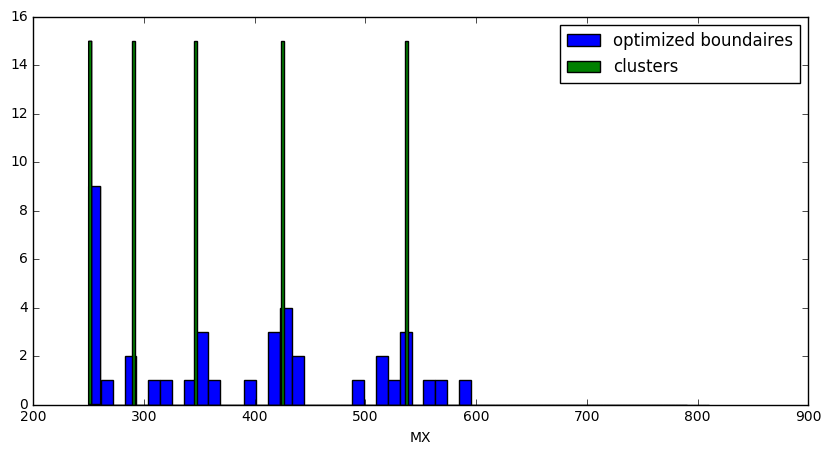

[ 250.      324.2451  423.976   536.896 ]


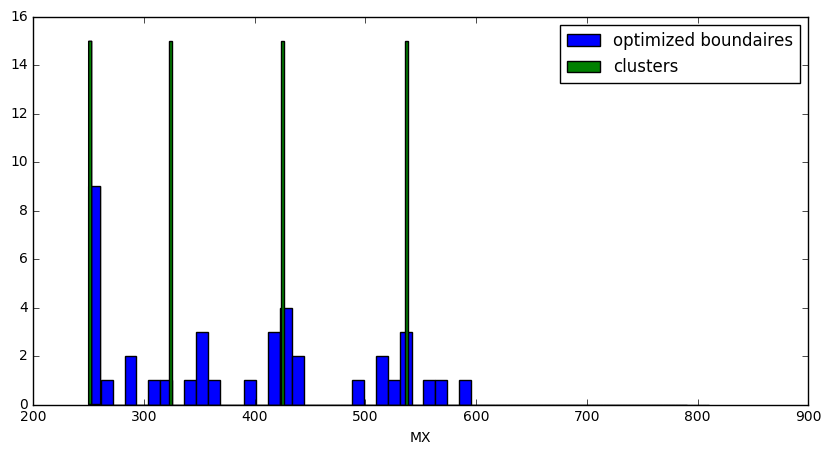

[ 250.       374.11055  536.896  ]


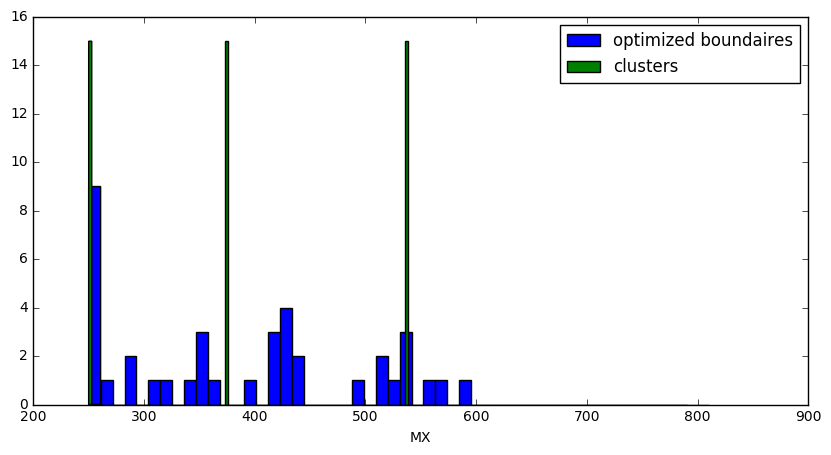

In [88]:
import matplotlib.pyplot as plt
for n_clusters in [4,3,2]:
    plt.figure(figsize=(10,5))
    plt.hist(boundaries,bins=50,range=[250,790],label="optimized boundaires");
#     kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
#     kmeans.fit(filtered_2.reshape(-1,1))
#     centers = np.array(kmeans.cluster_centers_.ravel().tolist()+[250,800]) 
#     plt.hist(centers,bins=200,range=[250,800],weights=40.*np.ones_like(centers));

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters+1, n_init=10)
    kmeans.fit(filtered.reshape(-1,1))
    centers = np.array([250]+kmeans.cluster_centers_.ravel().tolist())
    centers.sort()
    centers=centers[:-1]
    plt.hist(centers,bins=200,range=[250,810],weights=15.*np.ones_like(centers),label="clusters");
    plt.xlabel("MX")
    print(centers)
    
#     kmeans = KMeans(init='k-means++', n_clusters=n_clusters+2, n_init=10)
#     kmeans.fit(boundaries.reshape(-1,1))
#     centers = kmeans.cluster_centers_.ravel() 
#     plt.hist(centers,bins=200,range=[250,800],weights=30.*np.ones_like(centers));
    plt.legend()
    plt.show()